In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [80]:
people_df = pd.read_csv('data/people.csv')
people_df.head()

,name,age,gender,height,weight,bmi,sibling_count,birth_order
0,Jin,15,M,66,165,26.63,4,5
1,Sue,24,F,62,136,24.87,2,1
2,Ellen,23,F,69,167,24.66,3,2
3,Tina,18,F,67,140,18.79,1,2
4,Jerry,47,M,66,182,29.37,1,1


In [81]:
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
name             20 non-null object
age              20 non-null int64
gender           17 non-null object
height           20 non-null int64
weight           20 non-null int64
bmi              20 non-null float64
sibling_count    20 non-null int64
birth_order      20 non-null int64
dtypes: float64(1), int64(5), object(2)
memory usage: 1.3+ KB


In [82]:
people_df.isnull().sum()

name             0
age              0
gender           3
height           0
weight           0
bmi              0
sibling_count    0
birth_order      0
dtype: int64

In [83]:
people_df.gender.value_counts()

M    9
F    8
Name: gender, dtype: int64

In [84]:
people_df.name.nunique()

20

In [85]:
people_df.describe()

,age,height,weight,bmi,sibling_count,birth_order
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,39.000000,67.500000,169.950000,25.76000,1.850000,2.000000
std,18.948684,4.223992,29.653215,3.78468,1.598519,1.169795
min,15.000000,57.000000,111.000000,16.88000,0.000000,1.000000
25%,22.750000,66.000000,150.750000,24.65250,1.000000,1.000000
50%,35.000000,67.500000,166.000000,26.62500,1.500000,2.000000
75%,54.000000,69.250000,187.750000,27.73750,3.000000,3.000000
max,74.000000,78.000000,234.000000,33.11000,6.000000,5.000000


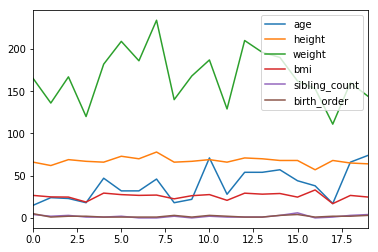

In [10]:
people_df.plot();

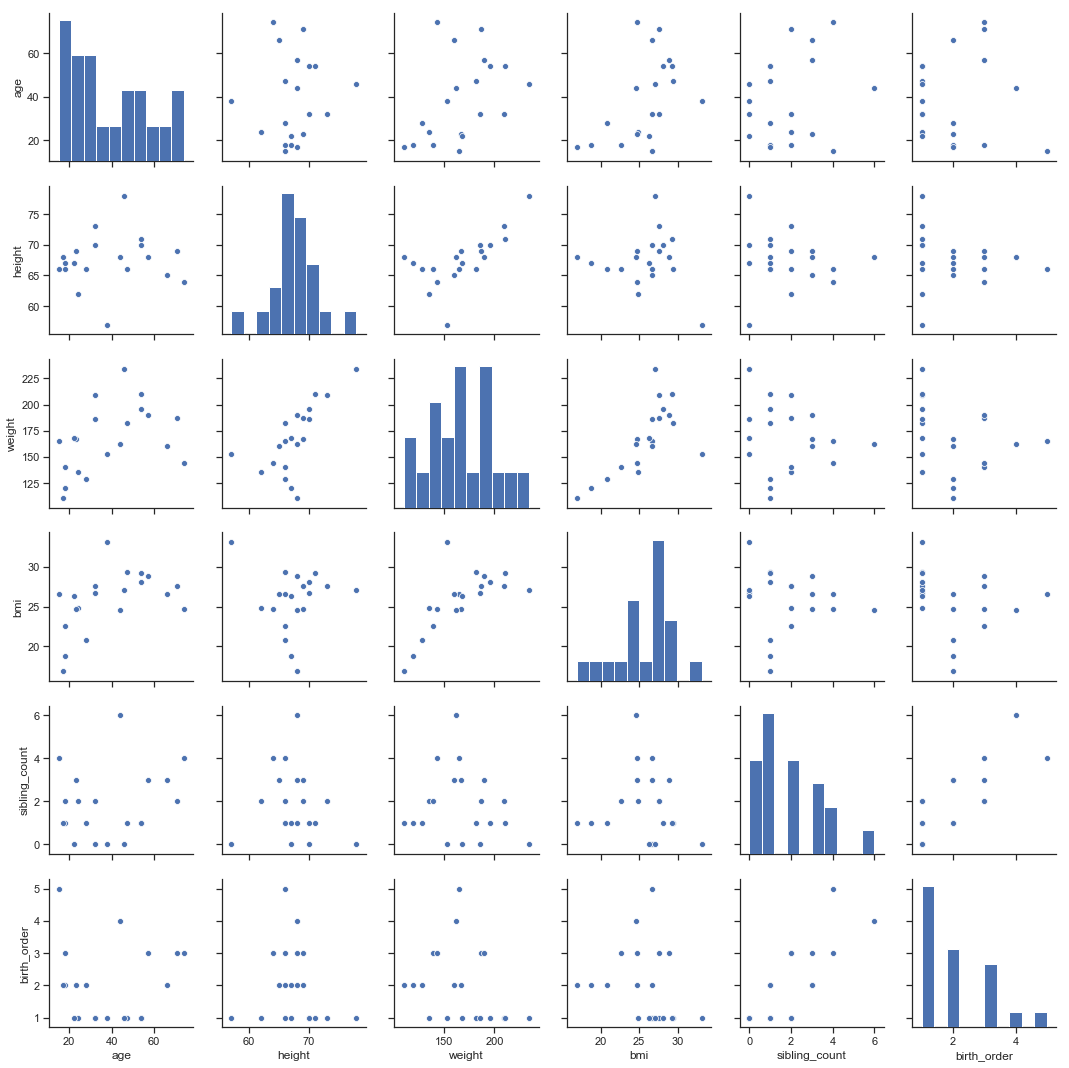

In [18]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(people_df);

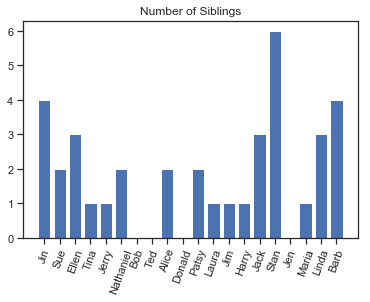

In [40]:
plt.bar('name', 'sibling_count', data = people_df)
plt.xticks(rotation = 70)
plt.title('Number of Siblings');

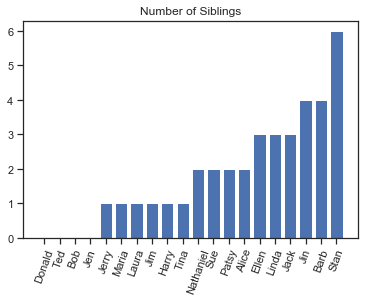

In [41]:
data = people_df.sort_values('sibling_count')
plt.bar('name', 'sibling_count', data = data)
plt.xticks(rotation = 70)
plt.title('Number of Siblings');

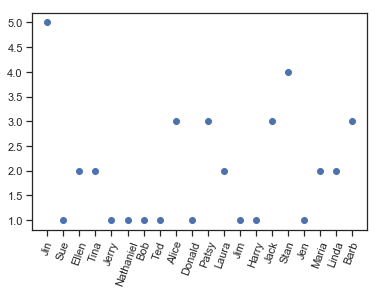

In [33]:
plt.plot('name', 'birth_order', marker = 'o', linestyle = 'none', data = people_df)
plt.xticks(rotation = 70);

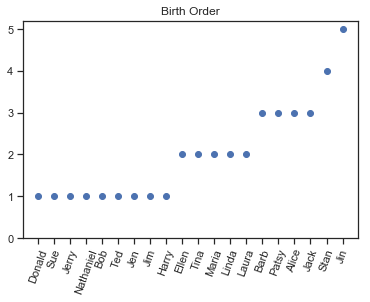

In [37]:
data = people_df.sort_values('birth_order')
plt.plot('name', 'birth_order', marker = 'o', linestyle = 'none', data = data)
plt.xticks(rotation = 70)
plt.yticks([0, 1, 2, 3, 4, 5])
plt.title('Birth Order');

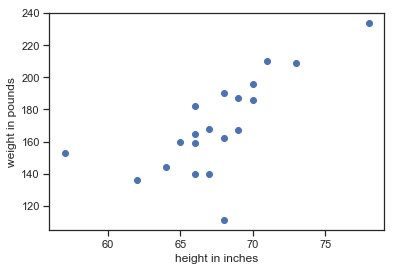

In [23]:
plt.scatter('height', 'weight', data = people_df)
plt.xlabel('height in inches')
plt.ylabel('weight in pounds');

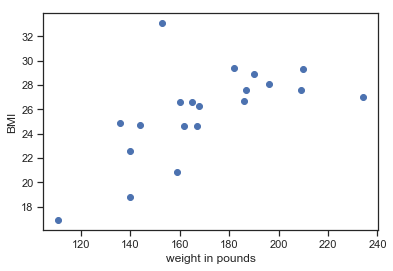

In [24]:
plt.scatter('weight', 'bmi', data = people_df)
plt.xlabel('weight in pounds')
plt.ylabel('BMI');

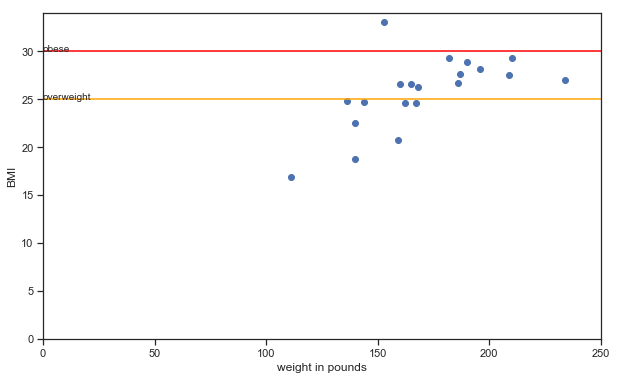

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter('weight', 'bmi', data = people_df)
plt.hlines(y=25, xmin = 0, xmax = 250, color = 'orange')
plt.hlines(y=30, xmin = 0, xmax = 250, color = 'red')
plt.xlim(0, 250)
plt.ylim(0, 34)
plt.annotate(s = 'overweight', xy = (0, 25))
plt.annotate(s = 'obese', xy = (0, 30))

plt.xlabel('weight in pounds')

plt.ylabel('BMI');

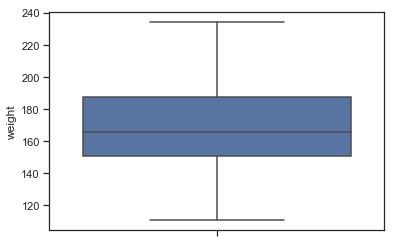

In [61]:
sns.boxplot(y=people_df.weight);

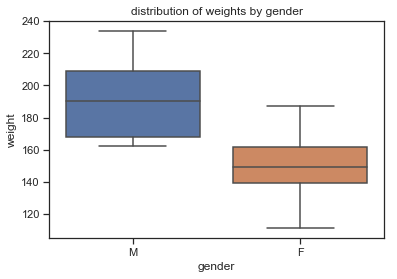

In [68]:
sns.boxplot(y=people_df.weight, x = people_df.gender, )
plt.title('distribution of weights by gender');
#plt.xlabel('')

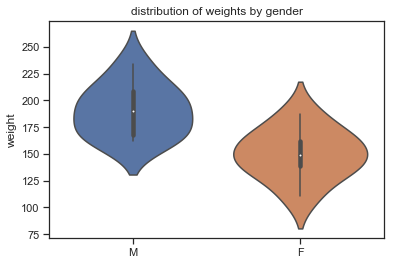

In [75]:
sns.violinplot(y=people_df.weight, x = people_df.gender)
plt.title('distribution of weights by gender')
plt.xlabel('');

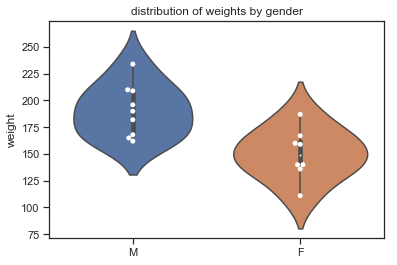

In [78]:
sns.violinplot(y=people_df.weight, x = people_df.gender)
sns.swarmplot(y=people_df.weight, x = people_df.gender, color = 'white')
plt.title('distribution of weights by gender')
plt.xlabel('');

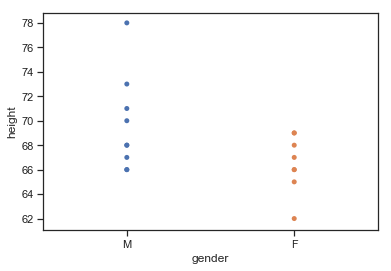

In [86]:
sns.stripplot(x=people_df.gender, y=people_df.height, jitter = False);

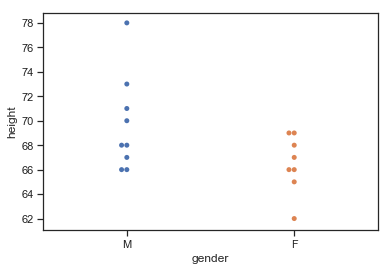

In [73]:
sns.swarmplot(x=people_df.gender, y=people_df.height);